<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [52]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [128]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [129]:
ds = pd.read_csv("bank-1.csv")    # complete the code to load the dataset

In [130]:
dsCopy = ds.copy()

## Data Overview

In [131]:
dsCopy.shape

(10000, 14)

Observation - This is 10,000 rows and 14 columns

In [132]:
dsCopy.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [133]:
dsCopy.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [134]:
dsCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [135]:
dsCopy.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [136]:
# let's check for missing values in the data
round(dsCopy.isnull().sum() / dsCopy.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

Observation: There are no missing values

In [137]:
dsCopy.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Observation: For category columns like Geography Gender, HasCrCredit, they are good candidates for one hot encoding.

Dropping colmns  - RowNumber, CustomerID. These columns are not needed. Will not have any impact on Exit Status.

## Exploratory Data Analysis

In [138]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [139]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

  

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [140]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [141]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [142]:
print (dsCopy.columns)
print ("**********")
print (dsCopy.dtypes)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
**********
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


### Univariate Analysis

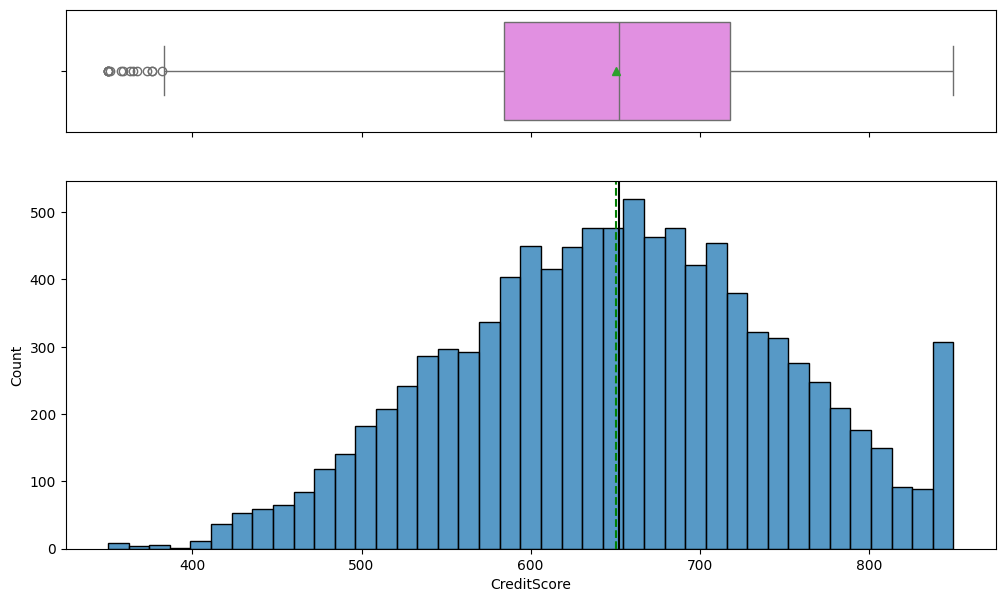

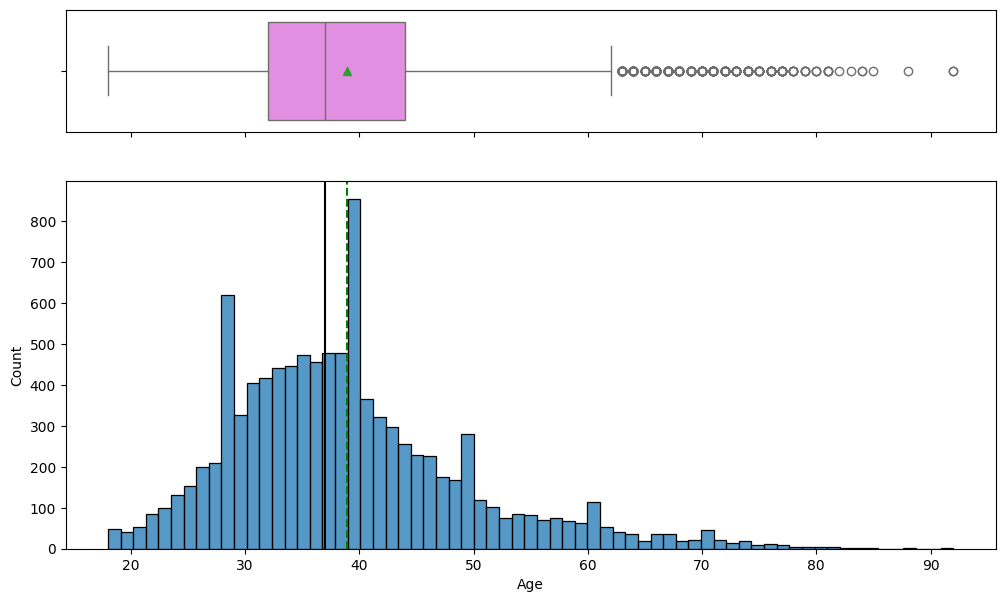

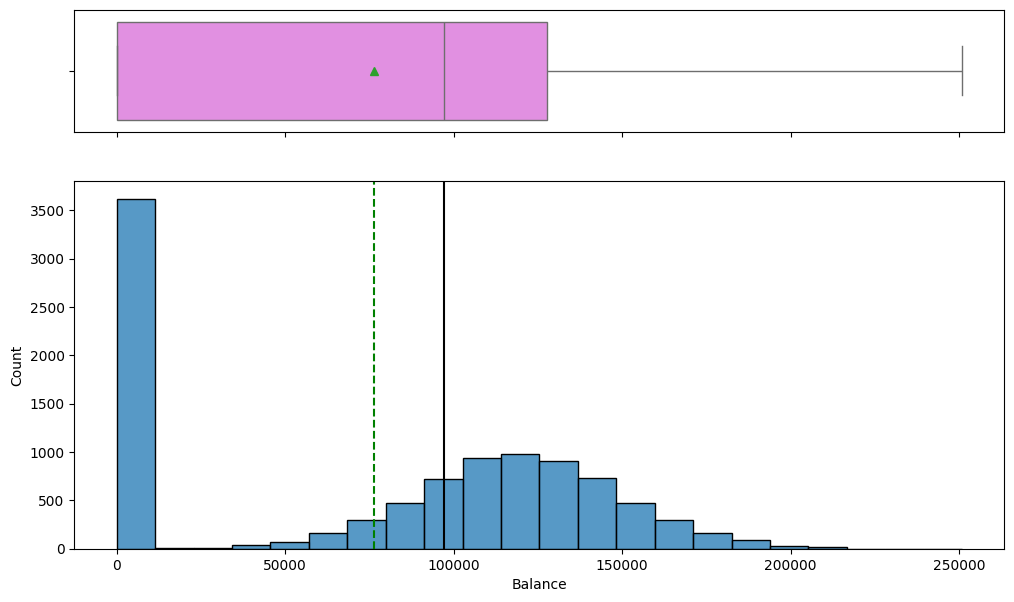

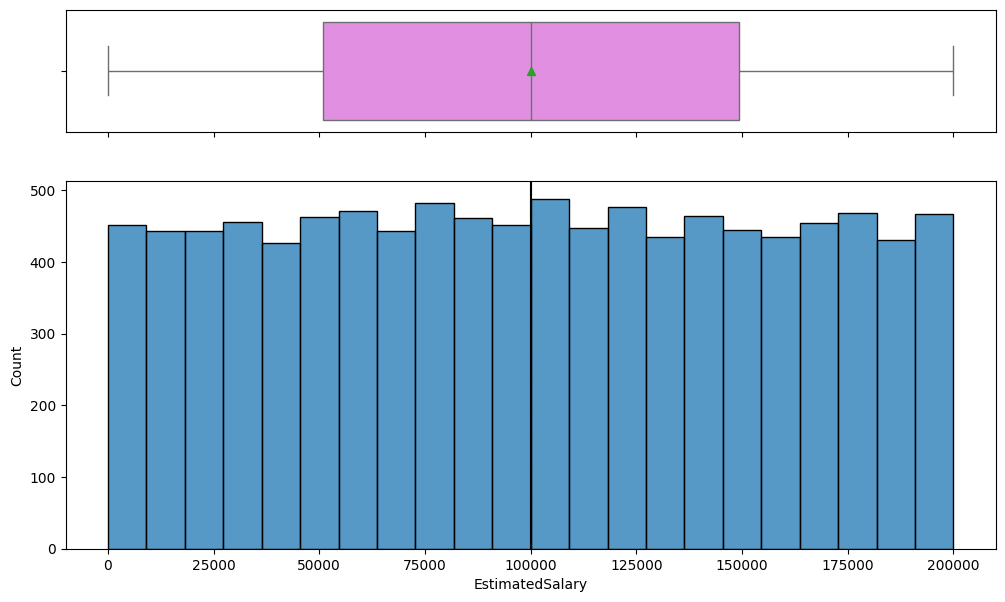

In [143]:
#histogram_boxplot(ds,'CreditScore')
import time
string_array = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

for word in string_array:
    histogram_boxplot(dsCopy, word)

Observations:

1. Credit Score is normally Distributed
2. Age looks to be normally distributed. It also has lot of outliers.

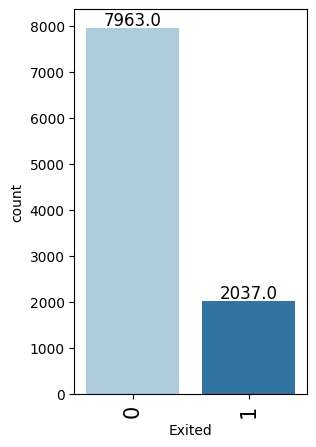

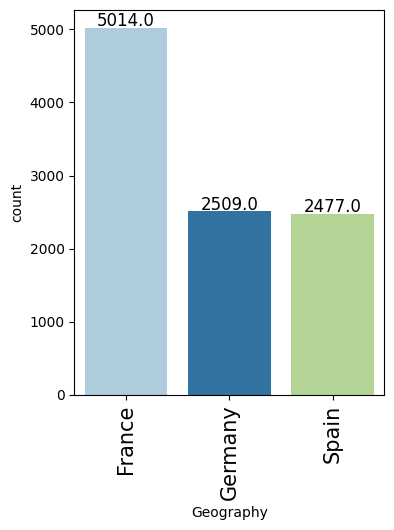

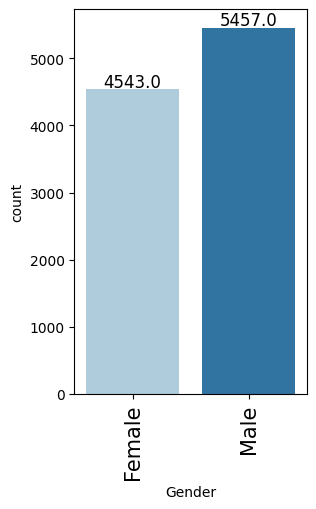

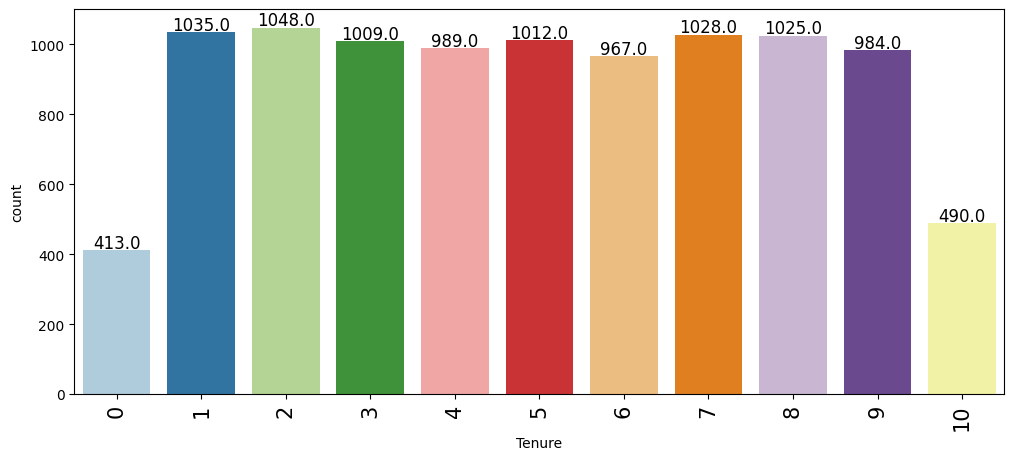

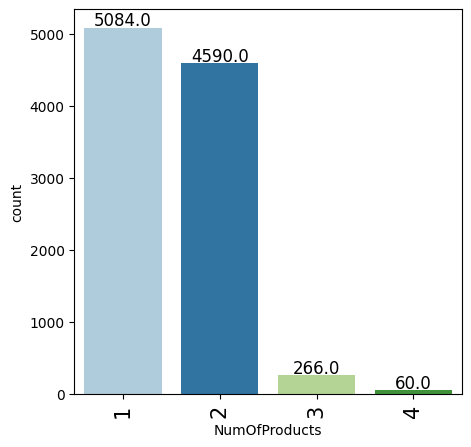

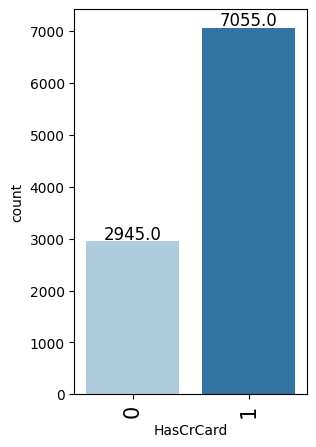

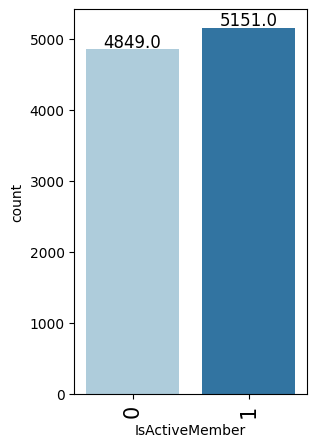

In [144]:
#histogram_boxplot(ds,'CreditScore')
import time
string_array = ["Exited", "Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]

for word in string_array:
    labeled_barplot(dsCopy, word)

### Bivariate Analysis

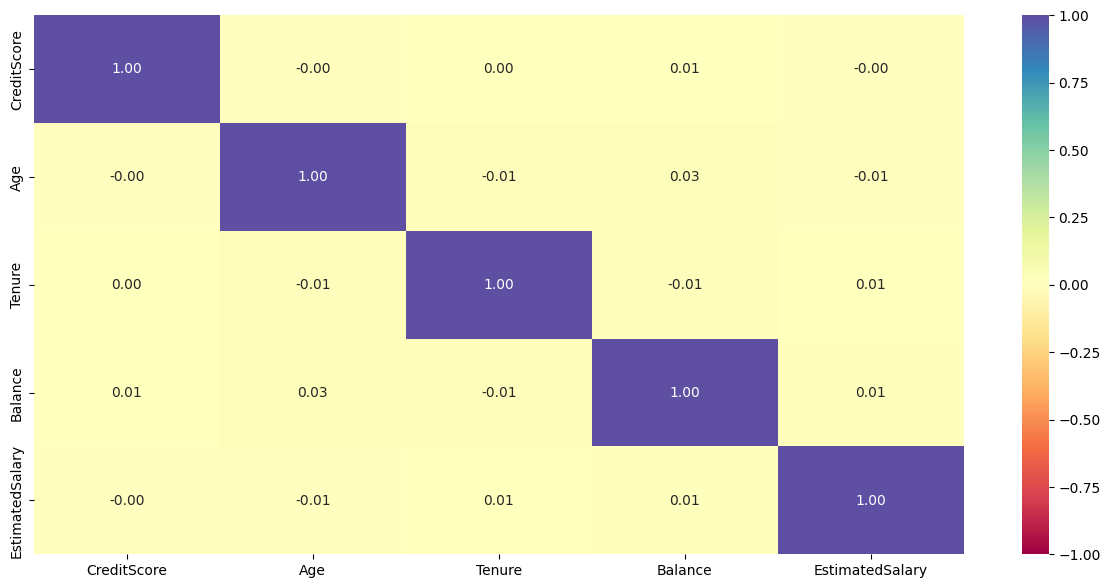

In [145]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
plt.figure(figsize=(15, 7))
sns.heatmap(dsCopy[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observaton: Don't see lot of correlation

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


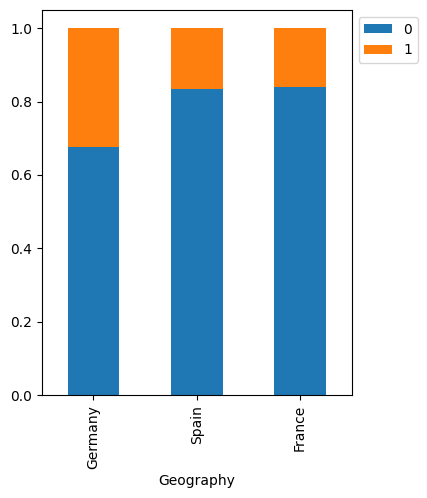

In [146]:
stacked_barplot(dsCopy, "Geography", "Exited" )

Obervation: Not a lot of varition. But we can see that Germany has the most exits. But the numbers are too close to come to a conclusion.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


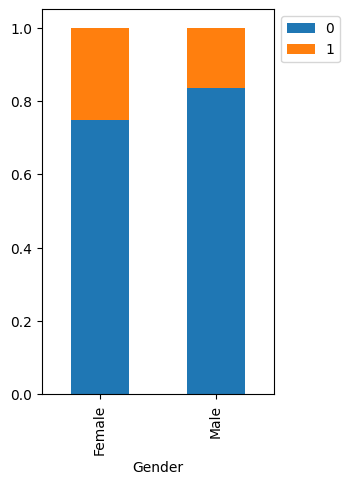

In [147]:
stacked_barplot(dsCopy, "Gender", "Exited" )

Obervation: Not a lot of varition. 

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


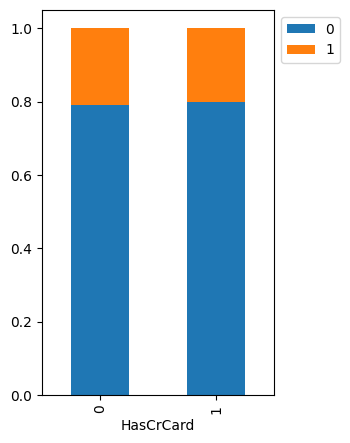

In [148]:
stacked_barplot(dsCopy, "HasCrCard", "Exited" )

Observation: Almost no variation

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


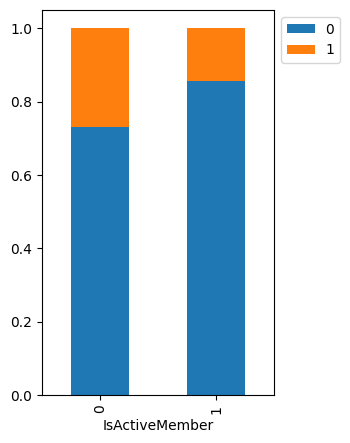

In [149]:
stacked_barplot(dsCopy, "IsActiveMember", "Exited" )

Obervation: Not a lot of varition to come to an conclusion.

<Axes: xlabel='Exited', ylabel='CreditScore'>

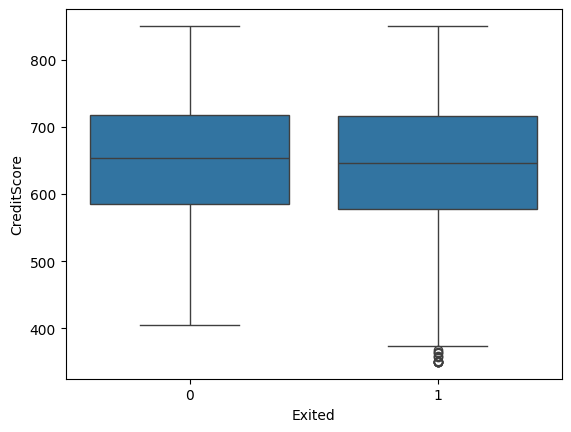

In [150]:
sns.boxplot(y='CreditScore',x='Exited',data=dsCopy)


<Axes: xlabel='Exited', ylabel='Age'>

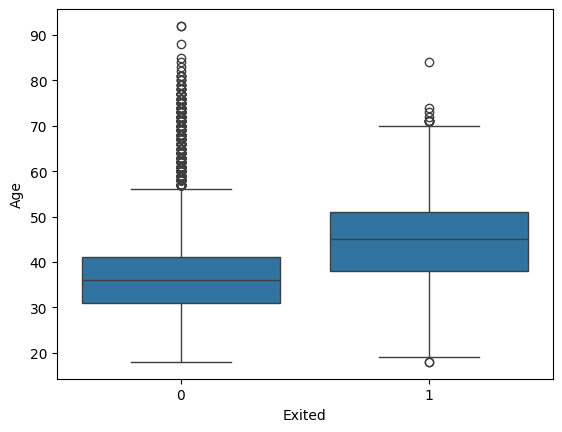

In [151]:
sns.boxplot(y='Age',x='Exited',data=dsCopy)


<Axes: xlabel='Exited', ylabel='Tenure'>

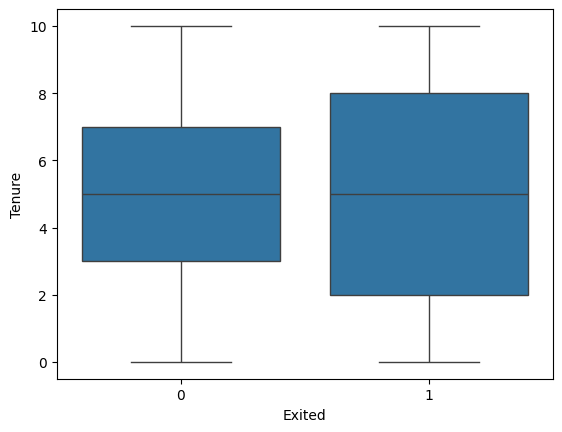

In [152]:
sns.boxplot(y='Tenure',x='Exited',data=dsCopy)

<Axes: xlabel='Exited', ylabel='Balance'>

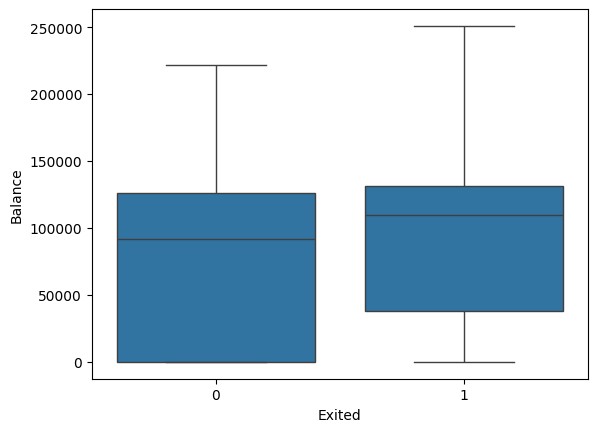

In [153]:
sns.boxplot(y='Balance',x='Exited',data=ds)

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

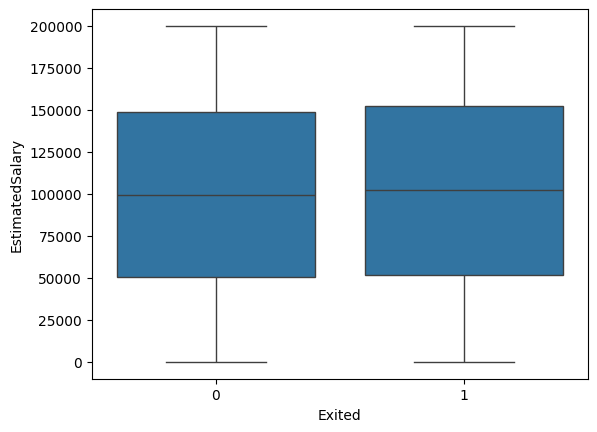

In [154]:
sns.boxplot(y='EstimatedSalary',x='Exited',data=dsCopy)

<Axes: xlabel='Exited', ylabel='NumOfProducts'>

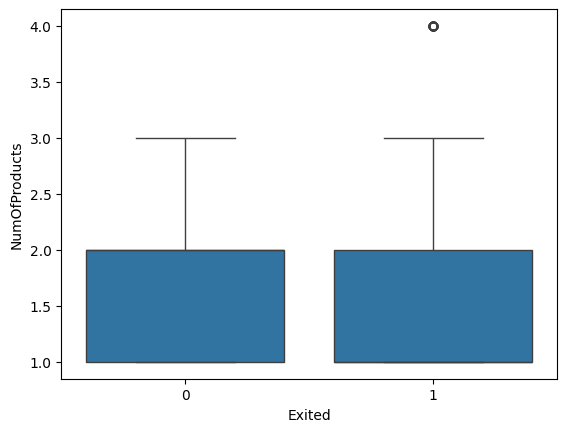

In [155]:
sns.boxplot(y='NumOfProducts',x='Exited',data=dsCopy)

## Data Preprocessing

## Separating Independent and Dependent Columns

In [156]:
## Separating Independent and Dependent Columns
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
Y = ds['Exited'] # Exited

### Dummy Variable Creation

In [157]:
# Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    X,
    columns=["Gender", "Geography", "HasCrCard", "IsActiveMember"],
    drop_first=True,dtype=float
)

### Data Normalization

In [158]:
#Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
X[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]] = transformer.fit_transform(X[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]])

### Unwanted Column Deletion

In [159]:
#RowNumber , CustomerId and Surname are unique hence dropping it
X = X.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [160]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard_1,IsActiveMember_1
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0.0,0.0,0.0,1.0,1.0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0.0,0.0,1.0,0.0,1.0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0.0,0.0,0.0,1.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0.0,0.0,0.0,0.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0.0,0.0,1.0,1.0,1.0


In [161]:
#X = np.asarray(X).astype(np.float32)

### Train-validation-test Split

In [162]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [163]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)


In [164]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


In [165]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [166]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average="weighted")  # to compute Recall
    precision = precision_score(
        target, pred, average="weighted"
    )  # to compute Precision
    f1 = f1_score(target, pred, average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1 Score": f1,
        },
        index=[0],
    )

    return df_perf

In [167]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

### Model Evaluation Criterion

**Write down the logic for choosing the metric that would be the best metric for this business scenario.**

A model can make wrong predictions in the following ways:

Predicting a customer will leave the bank in the next 6 months but they do not leave..
Predicting a customer will NOT leave the bank in the next 6 months but they DO leave..
Which case is more important?

Predicting a customer will NOT leave the bank in the next 6 months but they DO leave is More Important. Bank cares about retaining the customer and so it is important that we do not make wrong prediction of NOT Leaving while they actually leave

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

So we want to reduce False Negative. Hence Recall is important in this scenario

As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [168]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [169]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Neural Network with SGD Optimizer

In [170]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [171]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [172]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [174]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 0s 812us/step - loss: 1.3982 - val_loss: 0.7005
Epoch 2/25
100/100 [==============================] - 0s 411us/step - loss: 1.2889 - val_loss: 0.6424
Epoch 3/25
100/100 [==============================] - 0s 406us/step - loss: 1.2410 - val_loss: 0.6218
Epoch 4/25
100/100 [==============================] - 0s 404us/step - loss: 1.2001 - val_loss: 0.5993
Epoch 5/25
100/100 [==============================] - 0s 395us/step - loss: 1.1653 - val_loss: 0.5767
Epoch 6/25
100/100 [==============================] - 0s 400us/step - loss: 1.1365 - val_loss: 0.5671
Epoch 7/25
100/100 [==============================] - 0s 399us/step - loss: 1.1115 - val_loss: 0.5548
Epoch 8/25
100/100 [==============================] - 0s 394us/step - loss: 1.0884 - val_loss: 0.5418
Epoch 9/25
100/100 [==============================] - 0s 389us/step - loss: 1.0671 - val_loss: 0.5231
Epoch 10/25
100/100 [==============================] - 0s 399us/step - loss: 1.047

In [175]:
print("Time taken in seconds ",end-start)

Time taken in seconds  1.1738030910491943


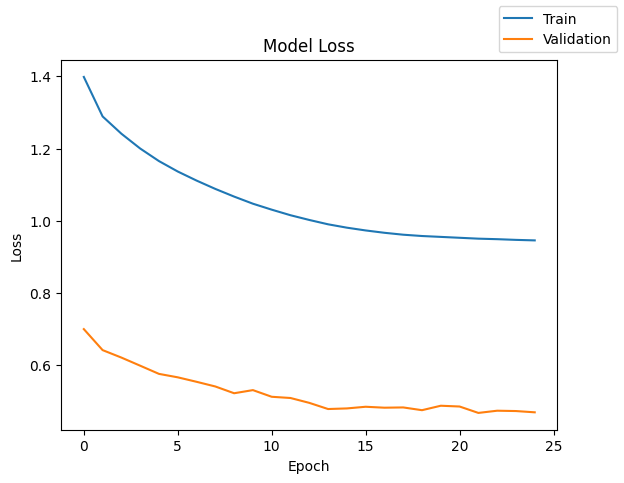

In [176]:
plot(history,'loss')

In [177]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 0s 232us/step


,Accuracy,Recall,Precision,F1 Score
0,0.78375,0.78375,0.836721,0.799411


In [178]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 [==============================] - 0s 242us/step


,Accuracy,Recall,Precision,F1 Score
0,0.771875,0.771875,0.822631,0.787826


## Neural Network with SGD Optimizer & Momentum

In [179]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [180]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [181]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [183]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 0s 813us/step - loss: 1.3364 - val_loss: 0.6289
Epoch 2/25
100/100 [==============================] - 0s 402us/step - loss: 1.1293 - val_loss: 0.5181
Epoch 3/25
100/100 [==============================] - 0s 399us/step - loss: 1.0442 - val_loss: 0.5430
Epoch 4/25
100/100 [==============================] - 0s 405us/step - loss: 0.9949 - val_loss: 0.5716
Epoch 5/25
100/100 [==============================] - 0s 398us/step - loss: 0.9703 - val_loss: 0.4514
Epoch 6/25
100/100 [==============================] - 0s 397us/step - loss: 0.9626 - val_loss: 0.4672
Epoch 7/25
100/100 [==============================] - 0s 393us/step - loss: 0.9592 - val_loss: 0.4703
Epoch 8/25
100/100 [==============================] - 0s 395us/step - loss: 0.9462 - val_loss: 0.4440
Epoch 9/25
100/100 [==============================] - 0s 392us/step - loss: 0.9432 - val_loss: 0.4401
Epoch 10/25
100/100 [==============================] - 0s 398us/step - loss: 0.942

In [184]:
print("Time taken in seconds ",end-start)

Time taken in seconds  1.1693921089172363


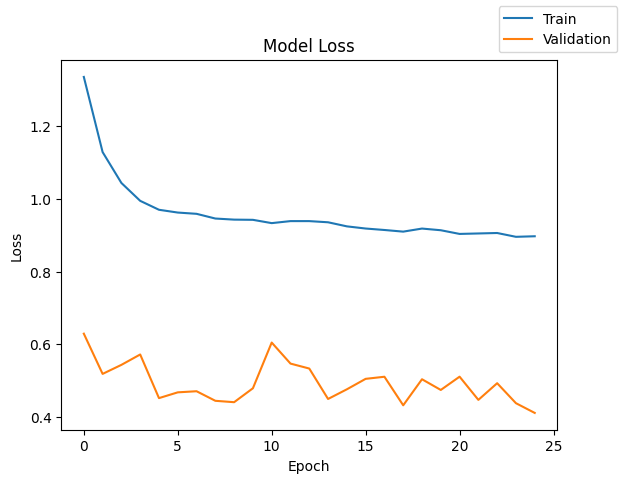

In [185]:
plot(history,'loss')

In [186]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 0s 229us/step


,Accuracy,Recall,Precision,F1 Score
0,0.835469,0.835469,0.850901,0.841275


In [187]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 [==============================] - 0s 246us/step


,Accuracy,Recall,Precision,F1 Score
0,0.826875,0.826875,0.839658,0.832006


## Model Performance Improvement

### Neural Network with Adam Optimizer

In [188]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [189]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [190]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [191]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [192]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 0s 865us/step - loss: 1.3249 - val_loss: 0.6318
Epoch 2/25
100/100 [==============================] - 0s 421us/step - loss: 1.2316 - val_loss: 0.5815
Epoch 3/25
100/100 [==============================] - 0s 421us/step - loss: 1.1640 - val_loss: 0.5809
Epoch 4/25
100/100 [==============================] - 0s 418us/step - loss: 1.1119 - val_loss: 0.5496
Epoch 5/25
100/100 [==============================] - 0s 414us/step - loss: 1.0741 - val_loss: 0.5149
Epoch 6/25
100/100 [==============================] - 0s 412us/step - loss: 1.0429 - val_loss: 0.5067
Epoch 7/25
100/100 [==============================] - 0s 412us/step - loss: 1.0155 - val_loss: 0.5205
Epoch 8/25
100/100 [==============================] - 0s 411us/step - loss: 0.9926 - val_loss: 0.5122
Epoch 9/25
100/100 [==============================] - 0s 612us/step - loss: 0.9762 - val_loss: 0.4823
Epoch 10/25
100/100 [==============================] - 0s 415us/step - loss: 0.960

In [193]:
print("Time taken in seconds ",end-start)

Time taken in seconds  1.400514841079712


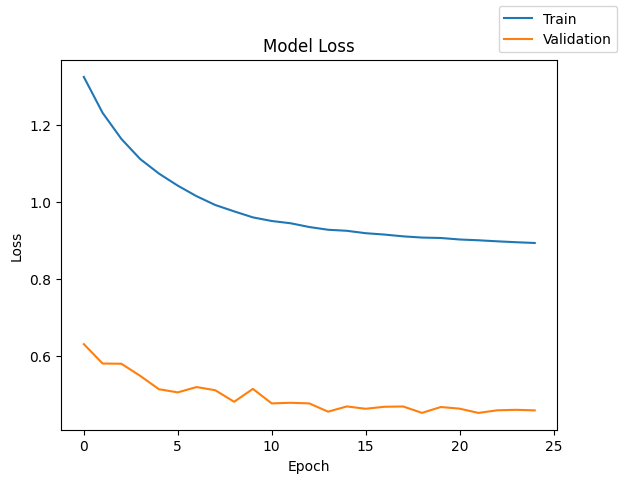

In [194]:
plot(history,'loss')

In [195]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 231us/step


,Accuracy,Recall,Precision,F1 Score
0,0.791562,0.791562,0.844585,0.806778


In [196]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 [==============================] - 0s 246us/step


,Accuracy,Recall,Precision,F1 Score
0,0.785,0.785,0.839953,0.800888


### Neural Network with Adam Optimizer and Dropout

In [197]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [198]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [199]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [201]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 0s 889us/step - loss: 1.8315 - val_loss: 0.6356
Epoch 2/25
100/100 [==============================] - 0s 441us/step - loss: 1.4263 - val_loss: 0.6960
Epoch 3/25
100/100 [==============================] - 0s 429us/step - loss: 1.3570 - val_loss: 0.7057
Epoch 4/25
100/100 [==============================] - 0s 431us/step - loss: 1.3344 - val_loss: 0.6868
Epoch 5/25
100/100 [==============================] - 0s 426us/step - loss: 1.3045 - val_loss: 0.6728
Epoch 6/25
100/100 [==============================] - 0s 425us/step - loss: 1.2932 - val_loss: 0.6514
Epoch 7/25
100/100 [==============================] - 0s 422us/step - loss: 1.2641 - val_loss: 0.6522
Epoch 8/25
100/100 [==============================] - 0s 427us/step - loss: 1.2621 - val_loss: 0.6430
Epoch 9/25
100/100 [==============================] - 0s 422us/step - loss: 1.2505 - val_loss: 0.6313
Epoch 10/25
100/100 [==============================] - 0s 424us/step - loss: 1.241

In [202]:
print("Time taken in seconds ",end-start)

Time taken in seconds  1.3194479942321777


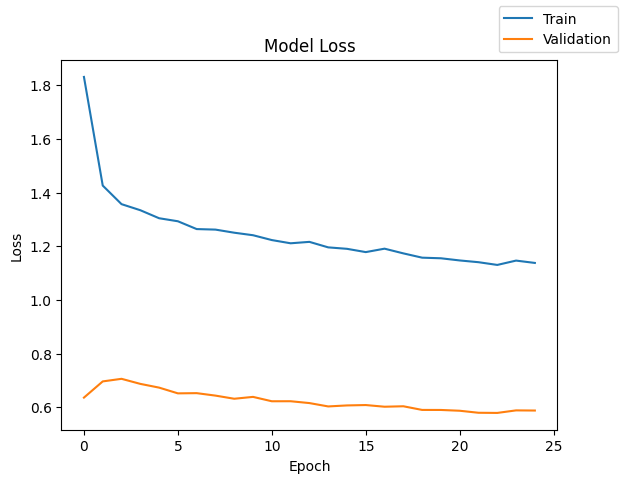

In [203]:
plot(history,'loss')

In [204]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

200/200 [==============================] - 0s 231us/step


,Accuracy,Recall,Precision,F1 Score
0,0.697656,0.697656,0.827779,0.726788


In [205]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 [==============================] - 0s 248us/step


,Accuracy,Recall,Precision,F1 Score
0,0.696875,0.696875,0.827149,0.726084


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [206]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [207]:
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [208]:
model = Sequential()
model.add(Dense(14, activation="relu", input_dim=X_train_smote.shape[1]))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [209]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [210]:
optimizer = tf.keras.optimizers.SGD(0.001)  # defining SGD as the optimizer to be used
metric = keras.metrics.Recall()
model.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=[metric])

In [211]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [212]:
import time

start = time.time()

history = model.fit(
    X_train_smote,
    y_train_smote,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
)
end = time.time()

Epoch 1/25
160/160 [==============================] - 0s 716us/step - loss: 1.6608 - recall: 0.9867 - val_loss: 0.9694 - val_recall: 1.0000
Epoch 2/25
160/160 [==============================] - 0s 380us/step - loss: 1.5856 - recall: 0.9974 - val_loss: 1.0434 - val_recall: 1.0000
Epoch 3/25
160/160 [==============================] - 0s 378us/step - loss: 1.5434 - recall: 0.9994 - val_loss: 1.0973 - val_recall: 1.0000
Epoch 4/25
160/160 [==============================] - 0s 375us/step - loss: 1.5186 - recall: 0.9996 - val_loss: 1.1353 - val_recall: 1.0000
Epoch 5/25
160/160 [==============================] - 0s 372us/step - loss: 1.5022 - recall: 1.0000 - val_loss: 1.1604 - val_recall: 1.0000
Epoch 6/25
160/160 [==============================] - 0s 371us/step - loss: 1.4901 - recall: 1.0000 - val_loss: 1.1739 - val_recall: 1.0000
Epoch 7/25
160/160 [==============================] - 0s 375us/step - loss: 1.4802 - recall: 0.9998 - val_loss: 1.1834 - val_recall: 1.0000
Epoch 8/25
160/160 [

In [213]:
print("Time taken in seconds ", end - start)

Time taken in seconds  1.728928804397583


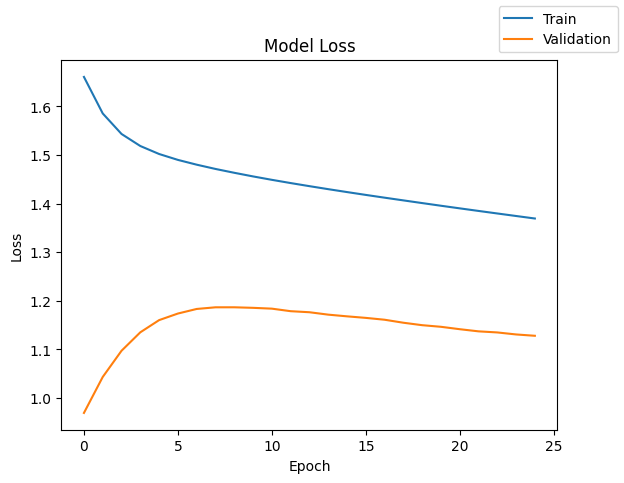

In [214]:
plot(history, "loss")

In [215]:
#plot(history, "recall")

In [216]:
model_4_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_4_train_perf

319/319 [==============================] - 0s 227us/step


,Accuracy,Recall,Precision,F1 Score
0,0.544152,0.544152,0.716213,0.430939


In [217]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

50/50 [==============================] - 0s 249us/step


,Accuracy,Recall,Precision,F1 Score
0,0.2825,0.2825,0.800955,0.222574


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [218]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [219]:
#Initializing the neural network
model = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model.add(Dropout(0.4))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model.add(Dense(7,activation='relu'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model.add(Dropout(0.2))
# Complete the code to add the number of neurons required in the output layer.
model.add(Dense(1, activation = 'sigmoid'))

In [220]:
optimizer = tf.keras.optimizers.Adam()  # defining SGD as the optimizer to be used
metric = keras.metrics.Recall()
model.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=[metric])

In [221]:
start = time.time()

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
)
end = time.time()

Epoch 1/25
100/100 [==============================] - 0s 1ms/step - loss: 1.4118 - recall: 0.7860 - val_loss: 0.6638 - val_recall: 0.7025
Epoch 2/25
100/100 [==============================] - 0s 458us/step - loss: 1.3056 - recall: 0.7032 - val_loss: 0.6136 - val_recall: 0.6779
Epoch 3/25
100/100 [==============================] - 0s 451us/step - loss: 1.2330 - recall: 0.6687 - val_loss: 0.5826 - val_recall: 0.6963
Epoch 4/25
100/100 [==============================] - 0s 452us/step - loss: 1.2180 - recall: 0.7040 - val_loss: 0.5730 - val_recall: 0.6994
Epoch 5/25
100/100 [==============================] - 0s 450us/step - loss: 1.1906 - recall: 0.7032 - val_loss: 0.5549 - val_recall: 0.7055
Epoch 6/25
100/100 [==============================] - 0s 447us/step - loss: 1.1670 - recall: 0.6979 - val_loss: 0.5350 - val_recall: 0.7055
Epoch 7/25
100/100 [==============================] - 0s 449us/step - loss: 1.1400 - recall: 0.7140 - val_loss: 0.5368 - val_recall: 0.7362
Epoch 8/25
100/100 [==

In [222]:
print("Time taken in seconds ", end - start)

Time taken in seconds  1.4124279022216797


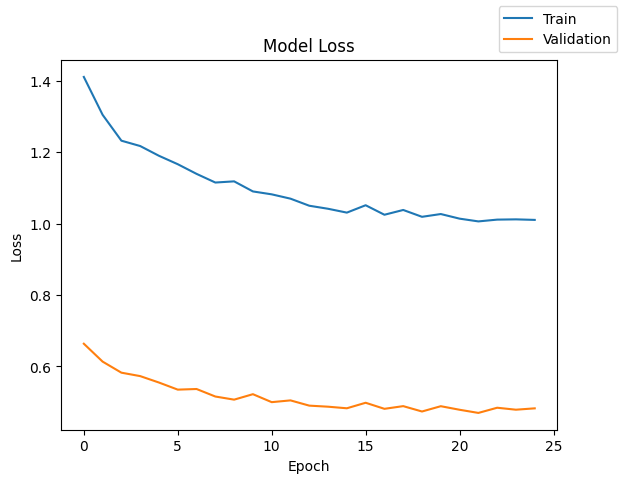

In [223]:
plot(history, "loss")

In [224]:
model_5_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_5_train_perf

319/319 [==============================] - 0s 227us/step


,Accuracy,Recall,Precision,F1 Score
0,0.783359,0.783359,0.783567,0.78332


In [225]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

50/50 [==============================] - 0s 250us/step


,Accuracy,Recall,Precision,F1 Score
0,0.77125,0.77125,0.8243,0.78763


## Neural Network SMOTE and Adam Optimizer

In [226]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [227]:
# Initializing the neural network
model = Sequential()
model.add(Dense(14, activation="relu", input_dim=X_train_smote.shape[1]))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [228]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
optimizer = tf.keras.optimizers.Adam()  # defining SGD as the optimizer to be used
metric = keras.metrics.Recall()
model.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=[metric])

In [230]:
start = time.time()
history = model.fit(
    X_train_smote,
    y_train_smote,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
)
end = time.time()

Epoch 1/25
160/160 [==============================] - 0s 758us/step - loss: 1.4955 - recall: 0.9971 - val_loss: 1.1502 - val_recall: 0.9969
Epoch 2/25
160/160 [==============================] - 0s 393us/step - loss: 1.3104 - recall: 0.9872 - val_loss: 1.0330 - val_recall: 0.9755
Epoch 3/25
160/160 [==============================] - 0s 391us/step - loss: 1.1906 - recall: 0.9714 - val_loss: 0.8861 - val_recall: 0.9417
Epoch 4/25
160/160 [==============================] - 0s 392us/step - loss: 1.1241 - recall: 0.9588 - val_loss: 0.9223 - val_recall: 0.9479
Epoch 5/25
160/160 [==============================] - 0s 390us/step - loss: 1.0972 - recall: 0.9568 - val_loss: 0.8816 - val_recall: 0.9387
Epoch 6/25
160/160 [==============================] - 0s 389us/step - loss: 1.0849 - recall: 0.9558 - val_loss: 0.8512 - val_recall: 0.9356
Epoch 7/25
160/160 [==============================] - 0s 393us/step - loss: 1.0768 - recall: 0.9547 - val_loss: 0.8396 - val_recall: 0.9356
Epoch 8/25
160/160 [

In [231]:
print("Time taken in seconds ", end - start)

Time taken in seconds  1.8633239269256592


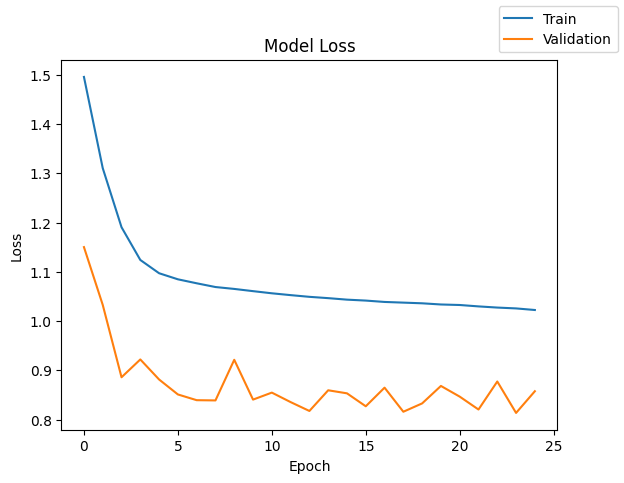

In [232]:
plot(history, "loss")

In [233]:
model_6_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_6_train_perf

319/319 [==============================] - 0s 224us/step


,Accuracy,Recall,Precision,F1 Score
0,0.713206,0.713206,0.782002,0.694579


In [234]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

50/50 [==============================] - 0s 237us/step


,Accuracy,Recall,Precision,F1 Score
0,0.54625,0.54625,0.830775,0.578985


## Model Performance Comparison and Final Model Selection

In [235]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "1. Neural Network with SGD Optimizer",
    "2. Neural Network SGD with Momentum",
    "3. Neural Network with Adam",
    "4. Neural Network with Adam and Drop Out",
    "5. Neural Network with SMOTE and SGD Optimizer",
    "5. Neural Network with SMOTE, SGD Optimizer & Drop Out",
    "6. Neural Network SMOTE and Adam Optimizer"
]

In [236]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "1. Neural Network with SGD Optimizer",
    "2. Neural Network SGD with Momentum",
    "3. Neural Network with Adam",
    "4. Neural Network with Adam and Drop Out",
    "5. Neural Network with SMOTE and SGD Optimizer",
    "5. Neural Network with SMOTE, SGD Optimizer & Drop Out",
    "6. Neural Network SMOTE and Adam Optimizer"
]

In [237]:
models_train_comp_df

,1. Neural Network with SGD Optimizer,2. Neural Network SGD with Momentum,3. Neural Network with Adam,4. Neural Network with Adam and Drop Out,5. Neural Network with SMOTE and SGD Optimizer,"5. Neural Network with SMOTE, SGD Optimizer & Drop Out",6. Neural Network SMOTE and Adam Optimizer
Accuracy,0.783750,0.835469,0.791562,0.697656,0.544152,0.783359,0.713206
Recall,0.783750,0.835469,0.791562,0.697656,0.544152,0.783359,0.713206
Precision,0.836721,0.850901,0.844585,0.827779,0.716213,0.783567,0.782002
F1 Score,0.799411,0.841275,0.806778,0.726788,0.430939,0.783320,0.694579


In [238]:
models_valid_comp_df

,1. Neural Network with SGD Optimizer,2. Neural Network SGD with Momentum,3. Neural Network with Adam,4. Neural Network with Adam and Drop Out,5. Neural Network with SMOTE and SGD Optimizer,"5. Neural Network with SMOTE, SGD Optimizer & Drop Out",6. Neural Network SMOTE and Adam Optimizer
Accuracy,0.771875,0.826875,0.785000,0.696875,0.282500,0.77125,0.546250
Recall,0.771875,0.826875,0.785000,0.696875,0.282500,0.77125,0.546250
Precision,0.822631,0.839658,0.839953,0.827149,0.800955,0.82430,0.830775
F1 Score,0.787826,0.832006,0.800888,0.726084,0.222574,0.78763,0.578985


### Final Model

In [239]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [240]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [241]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [242]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [243]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 0s 786us/step - loss: 1.3607 - val_loss: 0.6583
Epoch 2/25
100/100 [==============================] - 0s 396us/step - loss: 1.3129 - val_loss: 0.6427
Epoch 3/25
100/100 [==============================] - 0s 390us/step - loss: 1.2749 - val_loss: 0.6308
Epoch 4/25
100/100 [==============================] - 0s 395us/step - loss: 1.2377 - val_loss: 0.6093
Epoch 5/25
100/100 [==============================] - 0s 390us/step - loss: 1.2024 - val_loss: 0.5807
Epoch 6/25
100/100 [==============================] - 0s 386us/step - loss: 1.1719 - val_loss: 0.5743
Epoch 7/25
100/100 [==============================] - 0s 389us/step - loss: 1.1458 - val_loss: 0.5686
Epoch 8/25
100/100 [==============================] - 0s 382us/step - loss: 1.1230 - val_loss: 0.5592
Epoch 9/25
100/100 [==============================] - 0s 389us/step - loss: 1.1028 - val_loss: 0.5401
Epoch 10/25
100/100 [==============================] - 0s 384us/step - loss: 1.083

In [244]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

63/63 [==============================] - 0s 224us/step


In [245]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      5096
           1       0.46      0.76      0.58      1304

    accuracy                           0.77      6400
   macro avg       0.70      0.77      0.71      6400
weighted avg       0.83      0.77      0.79      6400



In [246]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1274
           1       0.44      0.73      0.55       326

    accuracy                           0.75      1600
   macro avg       0.68      0.75      0.69      1600
weighted avg       0.82      0.75      0.77      1600



In [247]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1593
           1       0.44      0.77      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



## Actionable Insights and Business Recommendations

Neural Network Model SGD & momentum is providing very high recall. If the model predicts a Yes, then initiate contact and provide offers to them to retain their account.



<font size=6 color='blue'>Power Ahead</font>
___